# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Vita Rizkyana Anggraeni
- **Email:** vitarizkyana@gmail.com
- **ID Dicoding:** vitarizkyana

## Menentukan Pertanyaan Bisnis

- Apakah musim memengaruhi jumlah sewa sepeda? Pada musim apakah rata-rata jumlah sewa sepeda mencapai nilai tertinggi?
- Bagaimana sebaran rata-rata jumlah sewa sepeda per bulan? Apakah sebanding dengan hasil berdasarkan musim?
- Bagaimana sebaran rata-rata jumlah sewa sepeda per jam? Pada jam berapakah sewa sepeda mencapai jumlah sewa terbanyak?
- Apakah rata-rata jumlah sewa sepeda pada hari libur lebih tinggi dibandingkan hari kerja?

## Import Semua Packages/Library yang Digunakan

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

#### Memuat tabel "day"

In [2]:
day_df = pd.read_csv("day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


#### Memuat tabel "hour"

In [3]:
hour_df = pd.read_csv("hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


#### Keterangan Data

    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month 
	- hr : hour
	- holiday : weather day is holiday or not
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Assessing Data

#### Menilai data "day_df"

##### Memeriksa tipe data di setiap kolom

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jumlah data pada day_df telah lengkap sehingga menunjukkan bahwa tidak terdapat missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data pada kolom dteday. Hasil di atas menunjukkan bahwa kolom tersebut bertipe object, seharusnya lebih tepat direpresentasikan sebagai tipe data datetime. Kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit berisi angka yang menunjukkan pengklasifikasian beberapa kategori sehingga termasuk data nominal. Oleh karena itu, tipe data integer akan diubah menjadi category agar tidak terjadi bias dalam analisis dan interpretasi hasil akhir.

##### Memeriksa jumlah duplikasi data

In [5]:
print("Jumlah data terduplikasi: ", day_df.duplicated().sum())

Jumlah data terduplikasi:  0


Diketahui bahwa tidak terdapat kasus duplikasi data.

##### Memeriksa parameter statistik dari setiap kolom bertipe numerik

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Hasil di atas menunjukkan bahwa beberapa kolom yaitu season, yr, mnth, holiday, weekday, workingday, dan weathersit memiliki jarak nilai minimum, maksimum, dan kuartil yang tidak begitu berbeda. Hal ini menjadi alasan kuat bahwa kolom-kolom tersebut memang mencirikan peubah kategorik karena angka yang terdapat di dalamnya menyatakan banyaknya jenis kategori yang terbentuk di setiap peubahnya. Oleh karena itu, hal ini akan ditangani pada tahap cleaning data untuk mengubah tipe data integer menjadi tipe data kategorik.

#### Menilai data "hour_df"

##### Memeriksa tipe data di setiap kolom

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Jumlah data pada hour_df telah lengkap sehingga menunjukkan bahwa tidak terdapat missing value di dalamnya. Kondisi yang sama seperti data day_df, terdapat kesalahan tipe data pada kolom dteday yang seharusnya lebih tepat direpresentasikan sebagai tipe data datetime. Selain itu, kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit juga termasuk ke dalam data kategori.

##### Memeriksa jumlah duplikasi data

In [8]:
print("Jumlah data terduplikasi: ", hour_df.duplicated().sum())

Jumlah data terduplikasi:  0


Diketahui bahwa tidak terdapat kasus duplikasi data.

##### Memeriksa parameter statistik dari setiap kolom bertipe numerik

In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Hasil di atas juga menunjukkan bahwa kolom season, yr, mnth, hr, holiday, weekday, workingday, dan weathersit memiliki jarak nilai minimum, maksimum, dan kuartil yang tidak begitu berbeda karena merupakan jenis data kategori. Oleh karena itu, pada tahap cleaning data akan dilakukan proses mengubah tipe data integer menjadi tipe data kategorik.

### Cleaning Data

#### Membersihkan data "day_df"

##### Mengubah tipe data yang tidak sesuai

In [10]:
day_df['dteday']=pd.to_datetime(day_df['dteday'])
day_df['season']=day_df.season.astype('category')
day_df['yr']=day_df.yr.astype('category')
day_df['mnth']=day_df.mnth.astype('category')
day_df['holiday']=day_df.holiday.astype('category')
day_df['weekday']=day_df.weekday.astype('category')
day_df['workingday']=day_df.workingday.astype('category')
day_df['weathersit']=day_df.weathersit.astype('category')

##### Memeriksa kembali tipe data di setiap kolom

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

#### Membersihkan data "hour_df"

##### Mengubah tipe data yang tidak sesuai

In [12]:
hour_df['dteday']=pd.to_datetime(hour_df['dteday'])
hour_df['season']=hour_df.season.astype('category')
hour_df['yr']=hour_df.yr.astype('category')
hour_df['mnth']=hour_df.mnth.astype('category')
hour_df['hr']=hour_df.hr.astype('category')
hour_df['holiday']=hour_df.holiday.astype('category')
hour_df['weekday']=hour_df.weekday.astype('category')
hour_df['workingday']=hour_df.workingday.astype('category')
hour_df['weathersit']=hour_df.weathersit.astype('category')

##### Memeriksa kembali tipe data di setiap kolom

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Eksplorasi data "day_df"

#### Melihat rangkuman parameter statistik dari data day_df

In [14]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Melihat persebaran rata-rata jumlah sewa sepeda harian berdasarkan musim

In [15]:
season_name = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
day_df['season_name'] = day_df['season'].map(season_name)

day_df.groupby('season_name', observed=False)['cnt'].mean().reset_index().sort_values("season_name")

,season_name,cnt
0,Spring,2604.132597
1,Summer,4992.331522
2,Fall,5644.303191
3,Winter,4728.162921


Berdasarkan hasil di atas, dapat dilihat bahwa persebaran setiap musim tidak merata. Rata-rata jumlah sewa sepeda tertinggi berada pada musim gugur (fall) dan terendah pada musim semi (spring).

#### Melihat persebaran rata-rata jumlah sewa sepeda harian berdasarkan bulan

In [16]:
day_df.groupby('mnth', observed=False)['cnt'].mean().reset_index().sort_values("cnt")

,mnth,cnt
0,1,2176.338710
1,2,2655.298246
11,12,3403.806452
2,3,3692.258065
10,11,4247.183333
3,4,4484.900000
9,10,5199.225806
4,5,5349.774194
6,7,5563.677419
7,8,5664.419355


Berdasarkan hasil di atas, dapat dilihat bahwa rata-rata jumlah sewa sepeda tertinggi berada pada bulan ke-6 yaitu Juni dan rata-rata jumlah sewa terendah berada pada bulan ke-1 yaitu Januari.

### Eksplorasi data "hour_df"

#### Melihat rangkuman parameter statistik dari data hour_df

In [17]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,5.0,17.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Melihat persebaran rata-rata jumlah sewa sepeda per jam

In [18]:
hour_df.groupby('hr', observed=False)['cnt'].mean().reset_index().sort_values("cnt")

,hr,cnt
4,4,6.352941
3,3,11.727403
5,5,19.889819
2,2,22.869930
1,1,33.375691
0,0,53.898072
6,6,76.044138
23,23,87.831044
22,22,131.335165
21,21,172.314560


Berdasarkan hasil di atas, dapat dilihat bahwa rata-rata jumlah sewa sepeda tertinggi berada pada pukul 17.00 dan terendah pada pukul 04.00.

#### Melihat persebaran rata-rata jumlah sewa sepeda berdasarkan hari kerja

In [19]:
hour_df.groupby('workingday', observed=False)['cnt'].mean().reset_index().sort_values("cnt")

,workingday,cnt
0,0,181.405332
1,1,193.207754


Hasil di atas menunjukkan bahwa rata-rata jumlah sewa sepeda pada hari kerja lebih tinggi dibandingkan hari lainnya (weekend/holiday).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah musim memengaruhi jumlah sewa sepeda? Pada musim apakah rata-rata jumlah sewa sepeda mencapai nilai tertinggi?

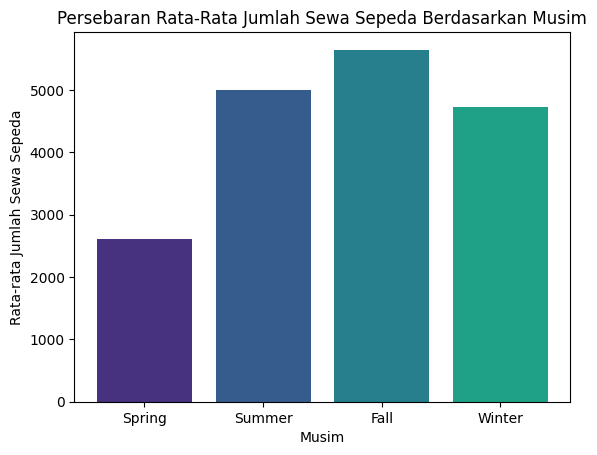

In [20]:
data_season = day_df.groupby('season', observed=False)['cnt'].mean()
season_names = ['Spring', 'Summer', 'Fall', 'Winter']
sn.set_palette("viridis")
plt.bar(season_names, data_season, color=sn.color_palette())
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sewa Sepeda')
plt.title('Persebaran Rata-Rata Jumlah Sewa Sepeda Berdasarkan Musim')
plt.show()

Hasil visualisasi bar plot di atas menunjukkan bahwa musim memiliki pengaruh terhadap banyaknya jumlah sewa sepeda. Terlihat bahwa rata-rata jumlah sewa sepeda tertinggi berada pada musim gugur (fall) dan terendah pada musim semi (spring). Hasil visualisasi ini sesuai dengan hasil pada tahap sebelumnya, yaitu eksplorasi data.

### Pertanyaan 2: Bagaimana sebaran rata-rata jumlah sewa sepeda per bulan? Apakah sebanding dengan hasil berdasarkan musim?

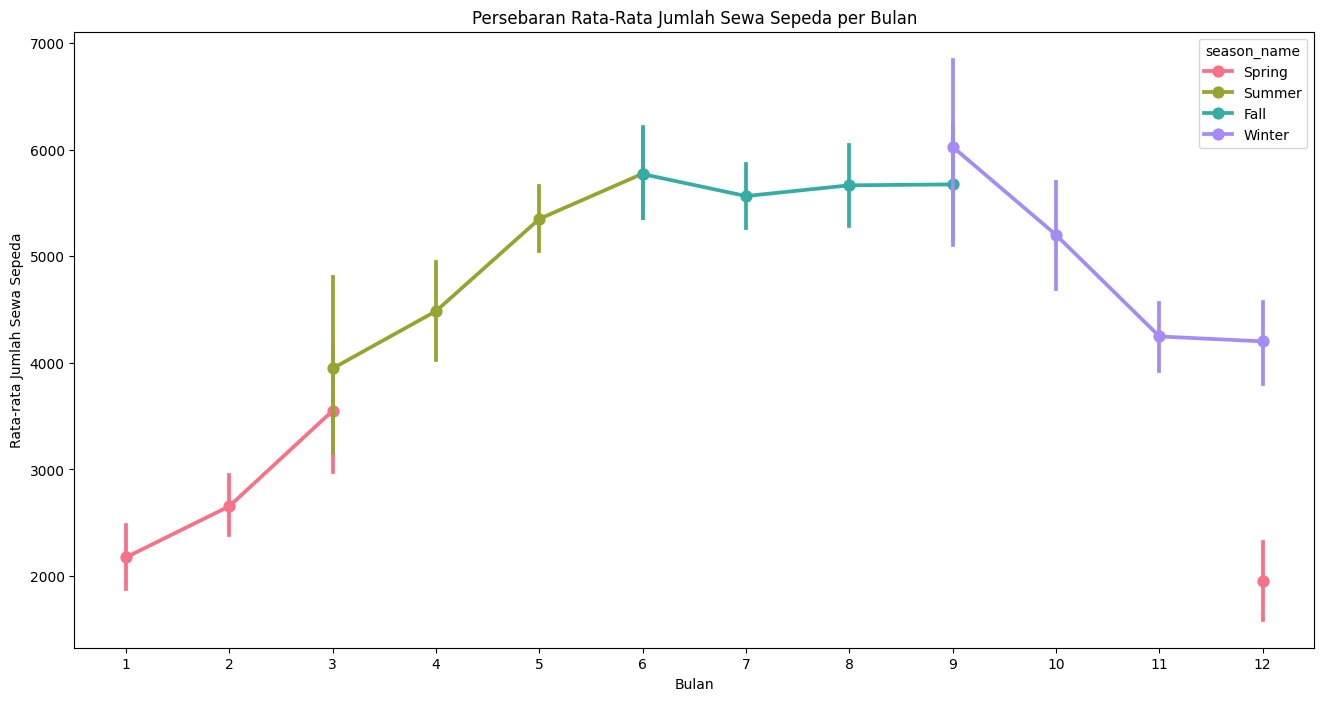

In [37]:
season_name = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
day_df['season_name'] = day_df['season'].map(season_name)

fig,ax=plt.subplots(figsize=(16,8))
palette = "husl"
sn.pointplot(data=day_df[['mnth','cnt','season_name']],x='mnth',
             y='cnt', hue='season_name',ax=ax, palette=palette)
ax.set(title='Persebaran Rata-Rata Jumlah Sewa Sepeda per Bulan')
ax.set_xlabel('Bulan')
ax.set_ylabel('Rata-rata Jumlah Sewa Sepeda')
plt.show()

Distribusi di atas menunjukkan jumlah sewa terendah berada pada bulan ke-1 yaitu Januari yang memasuki musim semi (spring). Rata-rata jumlah sewa sepeda mengalami peningkatan selama musim panas (summer). Sewa sepeda mencapai peningkatan tertinggi pada bulan ke-6 yaitu Juni yang memasuki awal musim gugur (fall) dan terlihat pola yang hampir konstan sehingga rata-rata jumlah sewa sepeda tertinggi berada pada musim gugur (fall). Hal ini sesuai dengan hasil eksplorasi dan visualisai sewa sepeda berdasarkan musim.

### Pertanyaan 3: Bagaimana sebaran rata-rata jumlah sewa sepeda per jam? Pada jam berapakah sewa sepeda mencapai jumlah sewa terbanyak?

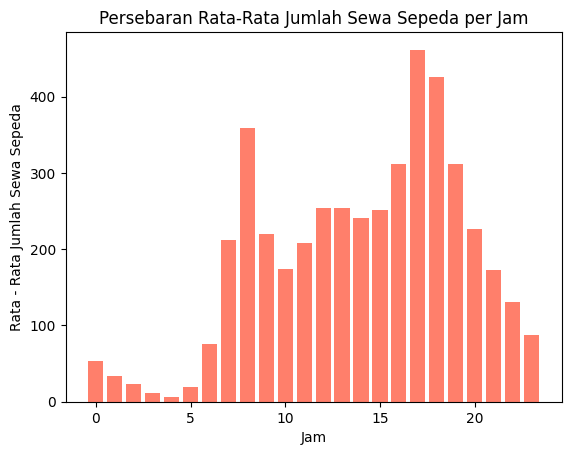

In [34]:
data_hour = hour_df.groupby('hr', observed=False)['cnt'].mean()
plt.bar(data_hour.index, data_hour.values, color='#ff7f6b')
plt.xlabel('Jam')
plt.ylabel('Rata - Rata Jumlah Sewa Sepeda')
plt.title('Persebaran Rata-Rata Jumlah Sewa Sepeda per Jam')
plt.show()

Bar plot di atas menunjukkan bahwa rata-rata jumlah sewa sepeda tertinggi berada sekitar pukul 17.00 - 18.00 dan terendah pada pukul 04.00.

### Pertanyaan 4: Apakah rata-rata jumlah sewa sepeda pada hari libur lebih tinggi dibandingkan hari kerja?

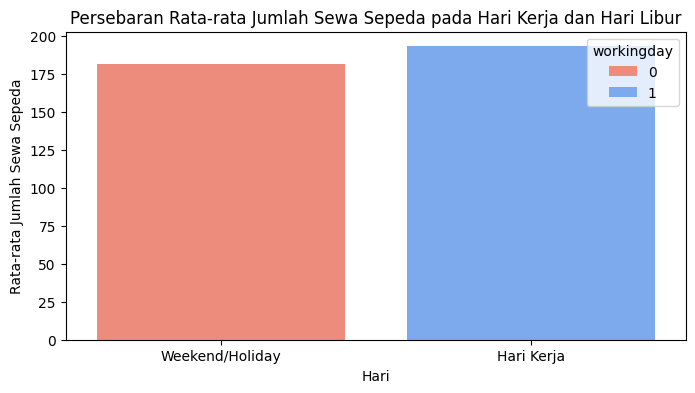

In [63]:
work_data = hour_df.groupby('workingday', observed=False)['cnt'].mean().reset_index().sort_values("cnt")
palette = ["#ff7f6b", "#6ba5ff"]
plt.figure(figsize=(8, 4))
sn.barplot(x='workingday', y='cnt', data=work_data, hue='workingday', palette=palette)
plt.title('Persebaran Rata-rata Jumlah Sewa Sepeda pada Hari Kerja dan Hari Libur')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Jumlah Sewa Sepeda')
plt.xticks([0, 1], ['Weekend/Holiday', 'Hari Kerja'])
plt.show()

Berdasarkan hasil di atas, jumlah sewa sepeda pada hari libur tidak lebih tinggi dibandingkan hari kerja.

## Conclusion

- Musim memiliki pengaruh terhadap jumlah sewa sepeda. Pada musim gugur (fall), jumlah sewa sepeda cenderung tinggi yang menandakan bahwa banyak permintaan pada musim tersebut. Sementara itu, jumlah sewa sepeda yang cenderung rendah terjadi pada saat musim semi (spring).
- Selain dilihat melalui musim, dilakukan analisis per bulan untuk membuktikan bahwa periode musiman benar mempengaruhi jumlah sewa sepeda. Hasil yang diperoleh menunjukkan bahwa jumlah penyewaan sepeda sangat rendah pada saat memasuki musim semi (spring) yaitu pada bulan ke-1 (Januari). Rata-rata jumlah sewa sepeda mengalami peningkatan selama musim panas (summer). Sewa sepeda mencapai peningkatan tertinggi pada bulan ke-6 yaitu Juni yang memasuki awal musim gugur (fall) dan terlihat pola yang hampir konstan sehingga rata-rata jumlah sewa sepeda tertinggi berada pada musim gugur (fall). Hal ini sesuai dengan hasil eksplorasi dan visualisai sewa sepeda berdasarkan musim.
- Jumlah sewa sepeda tertinggi berada sekitar pukul 17.00 - 18.00 dan terendah pada pukul 04.00.
- jumlah sewa sepeda pada hari kerja lebih tinggi dibandingkan hari libur. Hal ini dapat dihubungkan dengan poin sebelumnya, yaitu mungkin terjadi peningkatan jumlah sewa sepeda pada jam 17.00 karena merupakan jam pulang kerja pada umumnya. Oleh karena itu, banyak pekerja yang pulang bekerja menggunakan jasa sewa sepeda ini.